In [58]:
import numpy as np
from pycaret.regression import *
import pandas as pd
import seaborn as sns
import scipy.stats as st
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [59]:
df=pd.read_csv("../../../data/input/suanfarma_full_train_data.csv")
df_BHV_CFF=pd.read_csv("../../../data/input/suanfarma_BHV_CFF_train_data.csv")
df_NF=pd.read_csv("../../../data/input/suanfarma_NF_train_data.csv")
df_EXT=pd.read_csv("../../../data/input/suanfarma_EXT_train_data.csv")
df.drop(["id","Unnamed: 0"],axis=1,inplace=True)
df_BHV_CFF.drop(["id","Unnamed: 0"],axis=1,inplace=True)
df_NF.drop(["id","Unnamed: 0"],axis=1,inplace=True)
df_EXT.drop(["id","Unnamed: 0"],axis=1,inplace=True)

In [61]:
df_BHV_CFF.head()

,result,101WI610_mean,101WI610_std,101WI610_min,101WI610_25%,101WI610_50%,101WI610_75%,101WI610_max,306LI606_mean,306LI606_std,...,CONCTOTALE_20,CONCTOTALE_25,CONCTOTALE_5,CONCTOTALE_50,CONCTOTALE_75,CONCTOTALE_80,CONCTOTALE_85,CONCTOTALE_90,CONCTOTALE_95,CONCTOTALE_99
0,0.77300,13460.77362,17275.83736,1312.10546,1330.81072,1347.70573,15831.36514,56869.13920,0.00000,0.00000,...,0.31645,0.33190,-2.71153,0.32228,0.32209,0.36068,0.37681,1.00870,1.00939,1.00879
1,0.80200,30658.90245,32629.25831,1407.97249,1577.22771,23398.32917,57413.01563,98316.34989,0.00000,0.00000,...,0.29023,0.28872,0.28995,0.29110,0.29068,0.28827,0.30788,0.31816,0.36027,0.37365
2,0.76400,58439.85289,17694.21717,18136.58398,50241.52288,50308.50502,67612.44866,98501.61551,1858.32416,5640.75012,...,0.31690,0.31848,0.40376,0.36853,0.36854,0.40288,0.44613,1.00877,1.00765,1.00532
3,0.78300,38664.04546,27101.29546,1573.86272,19736.06390,19800.54506,66307.40024,97254.43862,858.08237,5035.38355,...,0.31971,0.31961,0.32731,0.31677,0.34559,0.34654,0.39546,0.39605,1.01248,1.01206
4,0.74000,33688.22369,33605.15596,1270.16750,1429.06422,21077.82101,62922.08650,91801.70536,2161.58787,8273.83161,...,0.40047,0.39833,0.39835,0.41553,0.41134,0.41452,0.41804,0.64582,0.99777,0.99396


In [62]:
df.columns

Index(['result', '101WI610_mean', '101WI610_std', '101WI610_min',
       '101WI610_25%', '101WI610_50%', '101WI610_75%', '101WI610_max',
       '306LI606_mean', '306LI606_std',
       ...
       'CONCTOTALE_20', 'CONCTOTALE_25', 'CONCTOTALE_5', 'CONCTOTALE_50',
       'CONCTOTALE_75', 'CONCTOTALE_80', 'CONCTOTALE_85', 'CONCTOTALE_90',
       'CONCTOTALE_95', 'CONCTOTALE_99'],
      dtype='object', length=2081)

In [63]:
df_BHV_CFF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 1241 entries, result to CONCTOTALE_99
dtypes: float64(1241)
memory usage: 387.9 KB


In [111]:
setup = regression.setup(
    data=df,
    target="result",
    train_size=0.8,
    session_id=666,
    fold=2,
    feature_selection = True,
    normalize = True)

,Description,Value
0,session_id,666
1,Target,result
2,Original Data,"(38, 2081)"
3,Missing Values,False
4,Numeric Features,2080
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(30, 1887)"


In [112]:
models = regression.compare_models(
    include=regression.models().index.tolist(), n_select=100
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.0208,0.0006,0.0247,0.1745,0.0142,0.0279,0.1450
rf,Random Forest Regressor,0.0212,0.0007,0.0254,0.1227,0.0146,0.0285,0.5450
br,Bayesian Ridge,0.0203,0.0007,0.0255,0.1207,0.0146,0.0272,0.1150
ridge,Ridge Regression,0.0203,0.0007,0.0255,0.1206,0.0146,0.0272,0.0500
lr,Linear Regression,0.0203,0.0007,0.0255,0.1188,0.0146,0.0272,2.5950
et,Extra Trees Regressor,0.0204,0.0007,0.0254,0.1172,0.0146,0.0273,0.5300
ard,Automatic Relevance Determination,0.0202,0.0007,0.0258,0.1021,0.0147,0.0270,13.1750
gbr,Gradient Boosting Regressor,0.0214,0.0007,0.0263,0.0514,0.0150,0.0286,0.2450
knn,K Neighbors Regressor,0.0221,0.0007,0.0269,0.0133,0.0154,0.0297,0.0950
en,Elastic Net,0.0218,0.0007,0.0271,-0.0002,0.0155,0.0294,0.0450


In [126]:
df_features = pd.DataFrame()

for model in models[:7]:
    tmp = None
    try:
        tmp = pd.DataFrame(
            {
                "Feature": regression.get_config("X_train").columns,
                "Value": abs(model.coef_[0]),
            }
        ).sort_values(by="Value", ascending=False)
    except Exception as ex:
        print(ex)
        try:
            tmp = pd.DataFrame(
                {
                    "Feature": regression.get_config("X_train").columns,
                    "Value": abs(model.feature_importances_[0]),
                }
            ).sort_values(by="Value", ascending=False)
        except Exception as ex:
            print(ex)
    if isinstance(tmp, pd.DataFrame):
        tmp.reset_index(drop=True, inplace=True)
        tmp["Model"] = str(type(model))
        df_features = df_features.append(tmp)
df_features.reset_index(inplace=True)
df_features["Value"].value_counts()

'AdaBoostRegressor' object has no attribute 'coef_'
'RandomForestRegressor' object has no attribute 'coef_'
'ExtraTreesRegressor' object has no attribute 'coef_'


0.00000    5661
0.00008    1887
0.00014    1887
0.00014    1887
0.00003    1887
Name: Value, dtype: int64

In [127]:
df_mean_feature_importance = pd.DataFrame(
    df_features.groupby(by=["Feature"])["index"].sum().sort_values(ascending=True)
)
df_mean_feature_importance=df_mean_feature_importance.reset_index()

In [128]:
df_mean_feature_importance

,Feature,index
0,158PI678_99,0
1,118PI638_95,7
2,158FI654_50%,14
3,118EI610_75%,21
4,158CAL4551_95,28
...,...,...
1882,306LI606_85,13174
1883,161FI656_75%,13181
1884,306TI604_25%,13188
1885,158TI650_50,13195


In [124]:
df_mean_feature_importance[["Sensor", "IDK"]] = df_mean_feature_importance["Feature"].str.split("_", 1, expand=True)
df_best_features = df_mean_feature_importance.drop_duplicates("Sensor")["Sensor"]
df_best_features.tolist()

['101AI605',
 '159FI654',
 '159FI652',
 '159CAL4551',
 '159FI666',
 '159FI656',
 '158TI673',
 '158TI672',
 '158TI684',
 '160CAL4552',
 '160CAL4551',
 '160FI652',
 '160FI654',
 '159FI667',
 '159TI650',
 '158TI650',
 '158FI656',
 '158FI654',
 '158FI652',
 '158FI666',
 '158CAL4551',
 '118TI978',
 '158CAL4552',
 '158PIC678',
 '158PI678',
 '158FI679P',
 '158FI667',
 '163FI666',
 '163FI656',
 '164FI654',
 '164CAL4551',
 '162FI666',
 '162FI656',
 '162TI650',
 '163FI654',
 '99PI621',
 '306TI604',
 '306LI606',
 'CONCTOTALE',
 '165CAL4551',
 '165TI650',
 '162FI654',
 '161CAL4551',
 '160TI650',
 '160FI667',
 '161FI652',
 '160FI666',
 '160FI656',
 '161TI650',
 '161FI667',
 '162CAL4551',
 '161FI656',
 '161FI654',
 '161FI666',
 '108AI610',
 '107TI652',
 '108FI681',
 '108AI613',
 '107PI650',
 '107PI608',
 '107TI607',
 '118AI611',
 '113LI682',
 '118AI631',
 '118AI627',
 '108TI652',
 '109LI606',
 '101TI607',
 '101PI603',
 '101TI637',
 '101PI602',
 '101AI635',
 '107FI681A',
 '107AI677A',
 '107LI606',
 '

In [ ]:
df=pd.read_csv("../../../data/input/suanfarma_full_train_data.csv")
df_BHV_CFF=pd.read_csv("../../../data/input/suanfarma_BHV_CFF_train_data.csv")
df_NF=pd.read_csv("../../../data/input/suanfarma_NF_train_data.csv")
df_EXT=pd.read_csv("../../../data/input/suanfarma_EXT_train_data.csv")
df.drop(["id","Unnamed: 0"],axis=1,inplace=True)
df_BHV_CFF.drop(["id","Unnamed: 0"],axis=1,inplace=True)
df_NF.drop(["id","Unnamed: 0"],axis=1,inplace=True)
df_EXT.drop(["id","Unnamed: 0"],axis=1,inplace=True)

In [283]:
df

,result,101WI610_mean,101WI610_std,101WI610_min,101WI610_25%,101WI610_50%,101WI610_75%,101WI610_max,306LI606_mean,306LI606_std,...,CONCTOTALE_20,CONCTOTALE_25,CONCTOTALE_5,CONCTOTALE_50,CONCTOTALE_75,CONCTOTALE_80,CONCTOTALE_85,CONCTOTALE_90,CONCTOTALE_95,CONCTOTALE_99
0,0.77300,13460.77362,17275.83736,1312.10546,1330.81072,1347.70573,15831.36514,56869.13920,0.00000,0.00000,...,0.31645,0.33190,-2.71153,0.32228,0.32209,0.36068,0.37681,1.00870,1.00939,1.00879
1,0.80200,30658.90245,32629.25831,1407.97249,1577.22771,23398.32917,57413.01563,98316.34989,0.00000,0.00000,...,0.29023,0.28872,0.28995,0.29110,0.29068,0.28827,0.30788,0.31816,0.36027,0.37365
2,0.76400,58439.85289,17694.21717,18136.58398,50241.52288,50308.50502,67612.44866,98501.61551,1858.32416,5640.75012,...,0.31690,0.31848,0.40376,0.36853,0.36854,0.40288,0.44613,1.00877,1.00765,1.00532
3,0.74000,33688.22369,33605.15596,1270.16750,1429.06422,21077.82101,62922.08650,91801.70536,2161.58787,8273.83161,...,0.40047,0.39833,0.39835,0.41553,0.41134,0.41452,0.41804,0.64582,0.99777,0.99396
4,0.75800,55587.03520,20430.70070,39126.76228,39258.45104,39713.79517,72965.46240,93491.93164,2994.10024,8124.38343,...,0.32658,0.32573,0.32797,0.32695,0.44377,0.48391,1.00035,0.99839,0.99778,0.99794
5,0.73300,57058.40588,35989.48032,1399.24512,19240.87440,56005.18450,96329.78460,98501.25841,3022.11311,8717.07132,...,0.33234,0.35132,0.38664,0.35664,0.40239,0.40308,0.40479,1.00256,1.00358,1.00251
6,0.72500,51853.50636,35391.17899,1423.26499,24825.53861,55475.75511,79093.16406,96443.60435,3356.49012,9934.67192,...,0.37130,0.37300,0.42475,0.47138,0.39906,0.39585,0.38959,0.99613,0.99592,0.99393
7,0.70300,17634.17522,23822.73067,1245.13251,1375.78975,1568.79735,28747.97656,69813.78683,0.00000,0.00000,...,0.38101,0.38323,0.38990,0.44003,0.47886,0.48787,0.48280,0.49111,1.01732,1.01357
8,0.75400,14383.19789,20784.58342,1272.56390,1298.59734,1331.08653,20827.87184,62111.78971,0.00000,0.00000,...,0.43561,0.42424,0.43185,0.46121,0.42567,0.44905,0.44780,0.46794,1.00933,1.00832
9,0.74100,12324.65744,17505.46202,1119.78308,1176.77930,1262.01829,18731.27557,54611.90234,0.00000,0.00000,...,0.43005,0.40285,0.48940,0.43134,0.43295,0.42867,0.43408,1.00838,1.00700,1.00693


y test Values: [0.69 0.73 0.76 0.79 0.74 0.76 0.72 0.76]
y pred Values: [0.74 0.76 0.75 0.76 0.76 0.75 0.74 0.75]
Full Process Modelling
r_score 0.23209528018434844
            Feature  FE_Value    Sensor
112   158FI666_mean   0.10711  158FI666
1466    158FI666_90   0.03810  158FI666
99     158FI654_std   0.02314  158FI654
106    158FI656_std   0.02119  158FI656
1443     158FI656_0   0.01438  158FI656
1965   163FI666_100   0.01432  163FI666
1840    161FI666_75   0.01412  161FI666
1968     163FI666_5   0.01365  163FI666
1251    118PI924_20   0.01319  118PI924
1114    118EI640_85   0.01286  118EI640
1432   158FI654_100   0.01104  158FI654
1428    158FI652_95   0.01033  158FI652
321    164FI654_max   0.01001  164FI654
1212    118PI914_20   0.00985  118PI914
421    118PI619_std   0.00904  118PI619


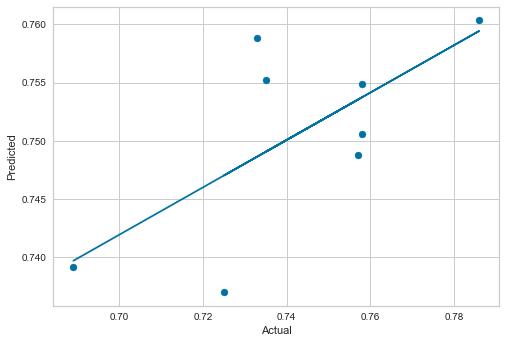

In [282]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score


X=df.drop("result",axis=1)
y=df["result"].ravel()

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    random_state=42,test_size=0.20)

regr = AdaBoostRegressor(random_state=0,n_estimators=300,learning_rate=0.01)

regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print("y test Values:",y_test.round(2))
print("y pred Values:",y_pred.round(2))
print("Full Process Modelling")
print("r_score",r2_score(y_test,y_pred))
importances = regr.feature_importances_
forest_importances = pd.DataFrame(pd.Series(importances, index=X_train.columns.values))
forest_importances.reset_index(inplace=True)
forest_importances.columns=["Feature","FE_Value"]
forest_importances=forest_importances.sort_values("FE_Value",ascending=False)[:15]
df_forest_importances=pd.DataFrame()
df_forest_importances[["Sensor", "IDK"]] = forest_importances[
    "Feature"
].str.split("_", 1, expand=True)
df_best_features = df_forest_importances[["Sensor"]]
forest_importances["Sensor"]=df_best_features
print(forest_importances)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_predicted = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test))

plt.show()

y test Values: [0.79 0.76 0.73 0.72 0.74 0.76 0.76 0.76]
y pred Values: [0.74 0.75 0.75 0.74 0.74 0.75 0.75 0.73]
BHV-CFF Process Modelling
r_score -0.4200265752424277
                Feature  FE_Value      Sensor
112       158FI666_mean   0.03572    158FI666
159        159FI656_75%   0.03528    159FI656
600         158FI666_90   0.03154    158FI666
348      158CAL4552_75%   0.02810  158CAL4552
121        158FI667_min   0.02661    158FI667
1112       163FI666_100   0.02480    163FI666
152        159FI654_75%   0.02432    159FI654
549       158CAL4552_95   0.02122  158CAL4552
99         158FI654_std   0.02118    158FI654
106        158FI656_std   0.01922    158FI656
1053        162FI666_80   0.01714    162FI666
499          101TI637_0   0.01628    101TI637
82    158PIC678_824_75%   0.01391   158PIC678
601         158FI666_95   0.01343    158FI666
1033        162FI656_10   0.01336    162FI656


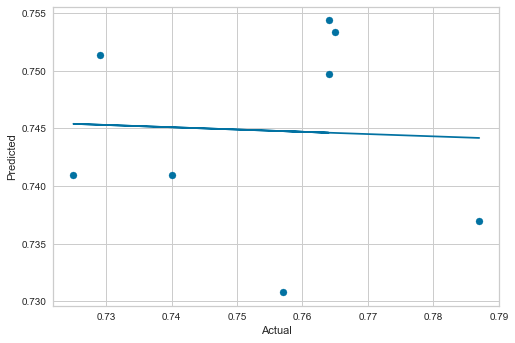

In [274]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesClassifier


X=df_BHV_CFF.drop("result",axis=1)
y=df_BHV_CFF["result"].ravel()

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    random_state=42,test_size=0.20)

regr = AdaBoostRegressor(random_state=0, n_estimators=300,learning_rate=0.01)

regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print("y test Values:",y_test.round(2))
print("y pred Values:",y_pred.round(2))
print("BHV-CFF Process Modelling")
print("r_score",r2_score(y_test,y_pred))
importances = regr.feature_importances_
forest_importances = pd.DataFrame(pd.Series(importances, index=X_train.columns.values))
forest_importances.reset_index(inplace=True)
forest_importances.columns=["Feature","FE_Value"]
forest_importances=forest_importances.sort_values("FE_Value",ascending=False)[:15]

df_forest_importances=pd.DataFrame()
df_forest_importances[["Sensor", "IDK"]] = forest_importances[
    "Feature"
].str.split("_", 1, expand=True)
df_best_features = df_forest_importances[["Sensor"]]
forest_importances["Sensor"]=df_best_features
print(forest_importances)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_predicted = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test))

plt.show()

y test Values: [0.79 0.76 0.73 0.72 0.74 0.76 0.76 0.76]
y pred Values: [0.75 0.74 0.77 0.75 0.75 0.75 0.74 0.75]
NF Process Modelling
r_score -0.6471762574719941
           Feature  FE_Value     Sensor
72    108AI613_min   0.11979   108AI613
157    107PI608_10   0.09432   107PI608
2     107LI606_min   0.07433   107LI606
162    107PI608_50   0.06329   107PI608
17    107PI608_25%   0.05642   107PI608
244    108FI681_90   0.04142   108FI681
145   107LI606_100   0.03532   107LI606
14   107PI608_mean   0.01783   107PI608
237    108FI681_20   0.01781   108FI681
19    107PI608_75%   0.01721   107PI608
156     107PI608_0   0.01223   107PI608
143     107LI606_0   0.01220   107LI606
94     107AI610_20   0.01159   107AI610
223   108AI613_100   0.01039   108AI613
117    107AI677A_0   0.00914  107AI677A


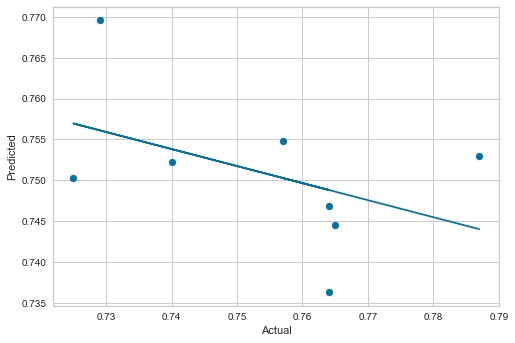

In [275]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesClassifier


X=df_NF.drop("result",axis=1)
y=df_NF["result"].ravel()

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    random_state=42,test_size=0.20)

regr = AdaBoostRegressor(random_state=0, n_estimators=300,learning_rate=0.01)

regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print("y test Values:",y_test.round(2))
print("y pred Values:",y_pred.round(2))
print("NF Process Modelling")
print("r_score",r2_score(y_test,y_pred))
importances = regr.feature_importances_
forest_importances = pd.DataFrame(pd.Series(importances, index=X_train.columns.values))
forest_importances.reset_index(inplace=True)
forest_importances.columns=["Feature","FE_Value"]
forest_importances=forest_importances.sort_values("FE_Value",ascending=False)[:15]

df_forest_importances=pd.DataFrame()
df_forest_importances[["Sensor", "IDK"]] = forest_importances[
    "Feature"
].str.split("_", 1, expand=True)
df_best_features = df_forest_importances[["Sensor"]]
forest_importances["Sensor"]=df_best_features
print(forest_importances)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_predicted = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test))

plt.show()

y test Values: [0.79 0.76 0.73 0.72 0.74 0.76 0.76 0.76]
y pred Values: [0.75 0.74 0.76 0.74 0.76 0.75 0.74 0.74]
EXT Process Modelling
r_score -0.29080089319237445
          Feature  FE_Value    Sensor
428   118PI914_20   0.04934  118PI914
279   118AI631_90   0.04203  118AI631
9    118PI618_min   0.03781  118PI618
550   118SI613_80   0.03665  118SI613
263   118AI627_75   0.03281  118AI627
467   118PI924_20   0.02865  118PI924
569   118TI970_10   0.02776  118TI970
265   118AI627_85   0.02721  118AI627
586    118TI971_5   0.02535  118TI971
23   118PI950_min   0.02367  118PI950
614   118TI978_75   0.02265  118TI978
216  113LI682_max   0.02151  113LI682
458   118PI916_75   0.02045  118PI916
354   118FI602_75   0.02026  118FI602
289   118AI641_75   0.01922  118AI641


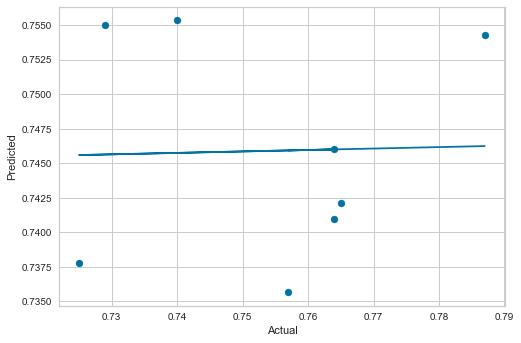

In [276]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesClassifier

df_EXT.dropna(axis=1,inplace=True)
X=df_EXT.drop("result",axis=1)
y=df_EXT["result"].ravel()

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    random_state=42,test_size=0.20)

regr = AdaBoostRegressor(random_state=0, n_estimators=300,learning_rate=0.01)

regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print("y test Values:",y_test.round(2))
print("y pred Values:",y_pred.round(2))
print("EXT Process Modelling")
print("r_score",r2_score(y_test,y_pred))
importances = regr.feature_importances_
forest_importances = pd.DataFrame(pd.Series(importances, index=X_train.columns.values))
forest_importances.reset_index(inplace=True)
forest_importances.columns=["Feature","FE_Value"]
forest_importances=forest_importances.sort_values("FE_Value",ascending=False)[:15]

df_forest_importances=pd.DataFrame()
df_forest_importances[["Sensor", "IDK"]] = forest_importances[
    "Feature"
].str.split("_", 1, expand=True)
df_best_features = df_forest_importances[["Sensor"]]
forest_importances["Sensor"]=df_best_features
print(forest_importances)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_predicted = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test))

plt.show()